In [1]:
import numpy as np # для матричных вычислений
import pandas as pd # для анализа и предобработки данных
import matplotlib.pyplot as plt # для визуализации
import seaborn as sns # для визуализации

%matplotlib inline
plt.style.use('seaborn')

from sklearn.cluster import KMeans # импортируем sklearn для кластеризации

### Задание 2.7

Вам как специалисту по анализу данных поступили показания с прибора, измеряющего количество нитратов и пестицидов в разных фруктах и овощах.

Значения количества пестицидов и нитратов записаны в столбцы с названиями x1 и x2.

Основываясь на этих двух свойствах, кластеризуйте данные и, используя коэффициент силуэта, найдите оптимальное количество кластеров.

In [2]:
data = pd.read_csv('data/values_from_the_instrument.zip')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


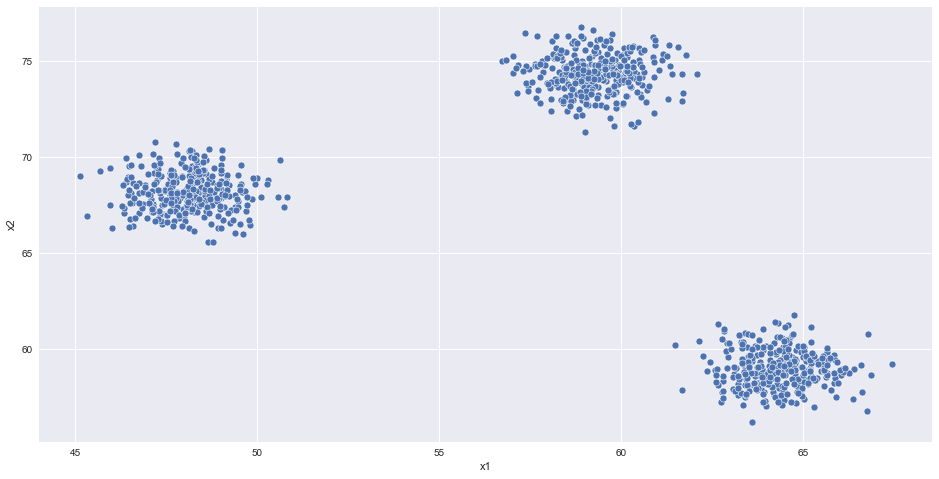

In [6]:
# Визуализирую данные
X = data

fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(data = X, x='x1', y='x2', ax=ax)
plt.show()

Визуально, очевидно наличие 3х кластеров

Найду оптимальное количество кластеров методом силуэта

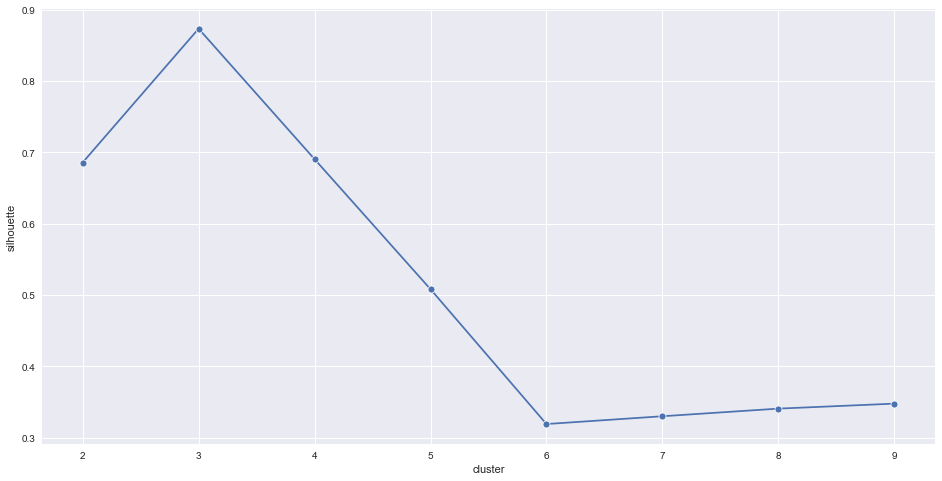

In [7]:
# импортируем метрику силуэт
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
    
    # подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {'silhouette': [], 'cluster': []}

# выберем нужные данные 
X = data

for cluster_num in range(2, 10):
    silhouette_res['silhouette'].append(get_silhouette(cluster_num, X))
    silhouette_res['cluster'].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style('darkgrid')

# визуализируем зависимость значения инерции от количества кластеров
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(data=silhouette_df, x='cluster', y='silhouette', marker= 'o', ax=ax)
plt.show()

Метод силуэта так же говорит о 3х оптимальных кластерах

Произведем кластеризацию по 3м кластерам

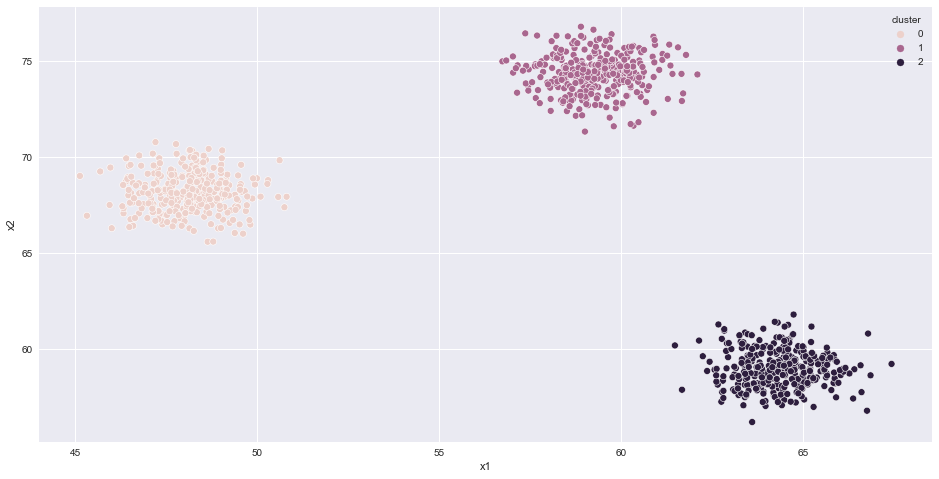

In [8]:
# инициализируем алгоритм k-means, с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)

# если мы хотим метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
data['cluster'] = predictions

fig, ax = plt.subplots(figsize=(16, 8)) # фигура + координатная плоскость
sns.scatterplot(data=data, x='x1', y='x2', hue='cluster', ax=ax)
plt.show()